In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Multivariate Visualizations
- Visualizations of three or more variables.

## Non Positional Encodings for Third Variables

- In univariate and bivariate visualizations, **position** (scatter plot) or **length** (bar charts) are used for encoding variables. Our perception for values is most precise with these encodings.
- When using a scatter plot, for example, we can apply different encodings (size, color) on the points to indicate the value of a third variable.
- The type of encoding that is most useful for the additional variable will depend on if it is qualitative or quantitative.
- There are three main types of additional encodings:
  - Shape
  - Size
  - Color

**1. Shape**
- It is a good encoding for **categorical** variables (using one shape for each level of the categorical variable).
- Since there is no natural order of shapes, this is an especially good choice for **nominal** type data.

**2. Size**
- It is often used for **numeric** variables.
- It is important to pay attention to the mapping between the variable's value to the size of each point.
- This can have a distorting effect since it is the area of the points that stands out. So a point with doubled value ends up with four times the area, a disproportionate representation.
- It is more common for area to be associated directly with value. Sometimes different functions might need to be used so that all points remain readable.

**3. Color**
- It is the most common third varible encoding.
- It can be used for **qualitative** and **quantitative** variables.

- There are four major cases when we want to plot three variables together:
    1. Three numeric variables
    2. Two numeric variables and one categorical variable
    3. One numeric variable and two categorical variables
    4. Three categorical variables
- If we have two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatter plot to encode two of the numeric variables, then using a non positional encoding on the points to convey the value of the third variable, whether numeric or categorical. 

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
fuel_econ['trans_type'] = fuel_econ['trans'].map(lambda x : x.split()[0])

In [3]:
pokemon = pd.read_csv('pokemon.csv')

### Two numeric variables and a third categorical varible
- A scatter plot to encode the two numeric variables (displ, comb)
- Using **shape** to encode the third categorical varible (trans_type)

In [4]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

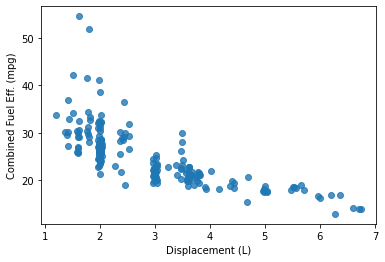

In [5]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb', x_jitter = 0.04, fit_reg = False)
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

- In both the regplot and scatter functions, the **marker** parameter can be used to set the shape of the plotted points.
- Unfortunately, in both cases, the parameter can only take a single string. This means that we need to create a loop to plot each subset of the data one by one onto the same axes object.

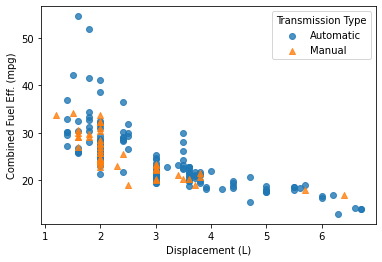

In [6]:
tt_markers = [['Automatic', 'o'], ['Manual', '^']]
for tt, marker in tt_markers:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_type'] == tt]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', marker = marker, fit_reg = False)
    #plt.scatter(data = plot_data, x = 'displ', y = 'comb', marker = marker)
plt.xlabel("Displacement (L)")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.legend(['Automatic', 'Manual'], title = 'Transmission Type');

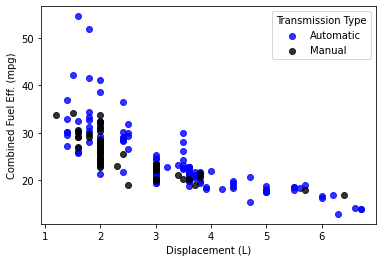

In [7]:
tt_colors = [['Automatic', 'blue'], ['Manual', 'black']]
for tt, color in tt_colors:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_type'] == tt]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', color = color, fit_reg = False)
    #plt.scatter(data = plot_data, x = 'displ', y = 'comb', color = color)
plt.xlabel("Displacement (L)")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.legend(['Automatic', 'Manual'], title = 'Transmission Type');

- We set up a list of lists with mappings of levels to symbol types.
- We used a list of lists rather than a dictionary so that we have a finer control of the order in which the levels are plotted.
- With multiple regplot calls, all of the data is plotted on the same axes, and different colors have been assigned automatically to each call.

### Three numeric variables
- A scatter plot to encode the first two numeric variables (displ, comb)
- Using **size** to encode the third numeric varible (co2)

- In matplotlib scatter function, we can set the marker size with the **s** parameter. The parameter will be set to the name of the column we want to map it to.
- In seaborn regplot functoin, the parameter will be set as part of a dictionary on the scatter keywords (scatter_kws) parameter and explicitly assign it the full series rather than just the column name. You might need to perform a scaling factor (e.g., multiplying or dividing by 2).
- You can decrease the marker size to see the points more clearly. Matplotlib will naturally associates the area of the points with the input values.
- When we use plotting functions in matplotlib and seaborn, we actually get back plotting objects.
- <font color = 'blue' size = 3px>In the legend function, if there is only one argument, then it is assumed to be the labels for the plot objects. With two arguments, however, The first one is a list of objects to be depicted in the legend, the second one is a list of labels. A title argument can also be added<font/>.

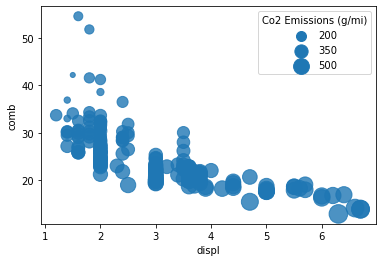

In [8]:
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           scatter_kws = {'s': fuel_econ_subset['co2'] / 2}, fit_reg = False)
legend_obj = []
sizes = [200, 350, 500]
basecolor = sb.color_palette()[0]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s / 2, color = basecolor))
plt.legend(legend_obj,sizes, title = 'Co2 Emissions (g/mi)');

- The legend will only create one legend entry per plot function call, so we need to create additional dummy scatter objects with reference sizes to create the plot.
- Size is much less precise encoding than position, so it's better used to make general qualitative judgements that precise judgements.
- If the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.

#### A warning on combining encodings
- Combining both shape and size encodings into the same plot to depict the trend in four varibles at once maybe technically true, But there are some cautions to be taken.
- One issue is that the code to depict the plot and a reasonable legend gets complicated. 
- A more important issue is that point areas will not be the same even with the same values, depending on the shape of the marker.

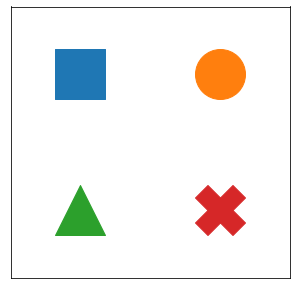

In [9]:
plt.figure(figsize = (5,5))
common_size = 2500
plt.scatter([0], [1], s = common_size, marker = 's')
plt.scatter([1], [1], s = common_size, marker = 'o')
plt.scatter([0], [0], s = common_size, marker = '^')
plt.scatter([1], [0], s = common_size, marker = 'X')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xticks([])
plt.yticks([]);

## Color Palettes

- Color is the most important non positional enconding.
- Color can be used for both qualitative and quantitative variables.
- Depending on your type of variable, you should be inclined to use a different color palette.

#### Qualitative Palettes
- This is the default palette class.
- They are geared towards **nominal** data.
- They consist of distinct hues with fairly similar saturation and brightness.
- This way, no ordering is implied, and individual levels are not applied as more important that others.

#### Sequential Palettes
- They should be used for **ordinal** and **numeric** data.
- In a good sequential palette, low values are indicated by lighter, less saturated colors, while high values are indicated by darker, more saturated colors.
- Sometimes this is flipped the other way around. The default sequential color map, **viridis**, takes the opposite approach (lighter colors for high values, and darker colors for low values).
- Usually, a single or small range of hues is used.

#### Diverging Palettes
- They should be used for **ordinal** or **numeric** data that have a meaningful **center point**.
- It's essentially two sequentail palettes with distinct hues put back to back, with the connecting color at the center point.
- One hue will indicate values greater than the center point, and the other hue will indicate values smaller than the center point.

- There are a couple of things to check even after selecting a palette regardless of type:
    1. Be mindful of hue choice and account for color blindness, especially in qualitative and diverging scales. If you want to use opposing colors like red and green in the same plot, try to make sure that they can be distinguished by those with color perception deficiencies. Avoid using colors that are too close in color brightness and saturation.
    2. Try to avoid transparency on top of color.
        - If points of different colors overlap, this can create uninterpretable new colors.
        - If points of the same color but different saturation overlap, this can create an altogether new and incorrect value to be perceived.
    

### Categorical Variable

#### Nominal Data (Transmission)
- We can use **sb.FacetGrid** function, and set the **hue** argument to the column of our choice.

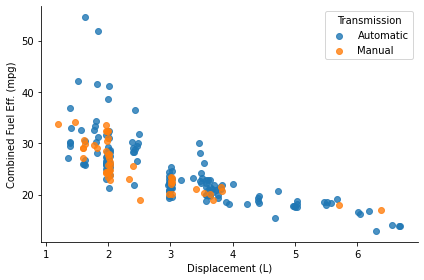

In [10]:
g = sb.FacetGrid(data =fuel_econ_subset, hue = 'trans_type', hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', fit_reg = False, x_jitter = 0.04)
plt.xlabel("Displacement (L)")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.legend(title = 'Transmission');
#The legend can also be added through g.add_legend(title = 'Transmission')

- **hue_order**: change the order in which the levels of the hue column are plotted.
- FacetGrid can also take ordering on other facet dimensions.

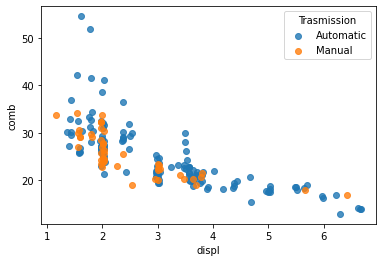

In [11]:
#Another way
color1 = sb.color_palette()[0]
color2 = sb.color_palette()[1]
tt_colors = [['Automatic', color1], ['Manual', color2]]
for tt, color in tt_colors:
    plot_data = fuel_econ_subset[fuel_econ_subset['trans_type'] == tt]
    sb.regplot(data = plot_data, x = 'displ', y = 'comb', color = color, fit_reg = False, x_jitter = 0.04)
plt.legend(['Automatic', 'Manual'], title = 'Trasmission');

#### Ordinal Data (Vehicle Class)
- We will have to use a sequential palette instead of the default qualitative palette using FacetGrid's **palette** parameter.

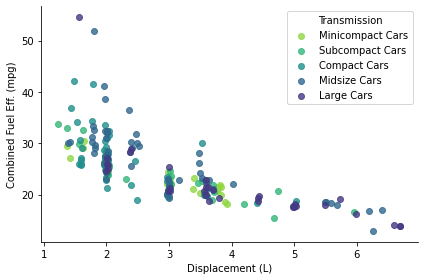

In [12]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass', height = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot, 'displ', 'comb', fit_reg = False, x_jitter = 0.04)
plt.xlabel("Displacement (L)")
plt.ylabel("Combined Fuel Eff. (mpg)")
plt.legend(title = 'Transmission');

### Numeric Variable

- When we have a third numeric varible, we shouldn't set the variable in the hue parameter because **FacetGrid only expects to facet across categorical variables** (FacetGrid expects any variable input for subsetting to be categorical).
- Instead, we should just use the basic **plt.scatter** function to create our plot. We lose the conventient jitter in this case, but there is an interaction in the color parameter in the regplot that make coloring by value hard to do.

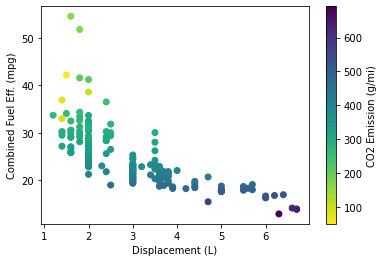

In [13]:
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'viridis_r')
plt.xlabel("Displacement (L)")
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 Emission (g/mi)');

- With **plt.scatter**, adding a third numeric variable via color is as simple as setting the **c** "color" parameter, and different color palettes are set through the camp parameter.
- Compared to the size encoding, the color encoding provides a more precise idea of value on the third variable, though certainly not as precise as positional encoding (**position > color > size**).

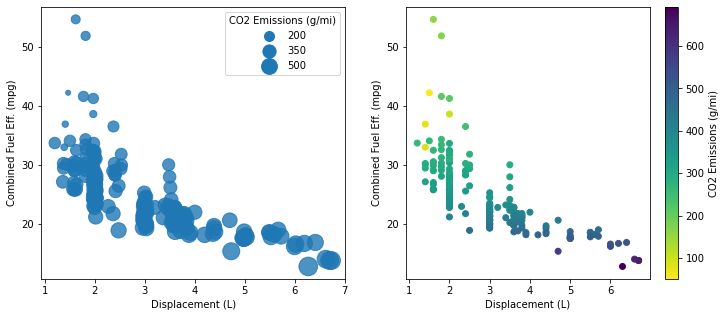

In [14]:
#A comparison between the size encoding and the color encoding
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sb.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           scatter_kws = {'s': fuel_econ_subset['co2'] / 2}, fit_reg = False, x_jitter = 0.04)
sizes = [200, 350, 500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/2, color = basecolor))
plt.legend(legend_obj, sizes, title = 'CO2 Emissions (g/mi)')    
plt.xlabel("Displacement (L)")
plt.ylabel('Combined Fuel Eff. (mpg)')

plt.subplot(1,2,2)
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'viridis_r')
plt.xlabel("Displacement (L)")
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 Emissions (g/mi)');

##### Summary of Non positional encodings
1. shape (through the marker parameter)
        a. `sb.regplot(marker = 'third varible')`
        b. `plt.scatter(marker = 'third variable')`
2. size (through the size parameter, **s**)
        a. `plt.scatter(s = 'third varible')`
        b. `sb.regplot(scatter_kws = {'s' : df['column']})`
3. color (through the color parameter, **c**)
        a. `sb.FacetGrid(hue = 'third varible', hue_order = [third varible order], palette = 'palette name')`
        b. `plt.scatter(c = 'third varible', cmap = 'palette name')`

#### Additional Example
How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon?

In [15]:
type_cols = ['type_1', 'type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type')

In [16]:
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


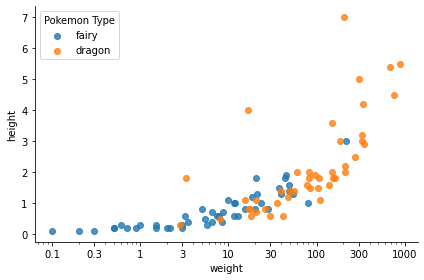

In [17]:
#Method 1
pkmn_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy', 'dragon'])]
g = sb.FacetGrid(data = pkmn_sub, hue = 'type', height = 4, aspect = 1.5)
g.map(sb.regplot, 'weight', 'height', fit_reg = False)
g.set(xscale = 'log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = ticks, xticklabels = ticks)
plt.legend(title = 'Pokemon Type');

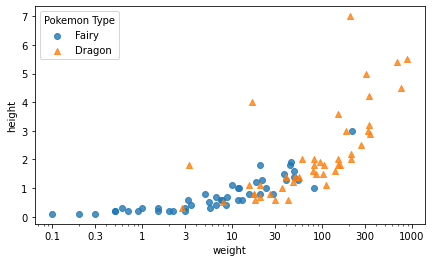

In [18]:
#Method 2
plt.figure(figsize = (7,4))
pt_markers = [['fairy', 'o'], ['dragon', '^']]
for pt, marker in pt_markers:
    plot_data = pkmn_sub.loc[pkmn_sub['type'] == pt]
    sb.regplot(data = plot_data, x = 'weight', y = 'height', marker = marker, fit_reg = False)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type');

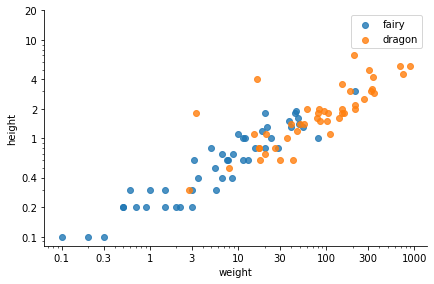

In [19]:
g = sb.FacetGrid(data = pkmn_sub, hue = 'type', hue_order = ['fairy', 'dragon'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'weight', 'height', fit_reg = False)
plt.xscale('log')
plt.yscale('log')
xticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
yticks = [0.1, 0.2, 0.4, 1, 2, 4, 10, 20]
plt.xticks(xticks, xticks)
plt.yticks(yticks, yticks)
plt.legend();

## Faceting in Two Directions

- One way of adding an additional dimension to plots is through the use of faceting.
- When we facet a univariate plot by levels of a second variable, we get a bivariate plot. And when we facet a bivariate plot by levels of a third varible, we get a multivariate plot.
- We are not limited to faceting by only one variable. We can also choose to facet plots across two varibles, one on the rows and one on the columns.

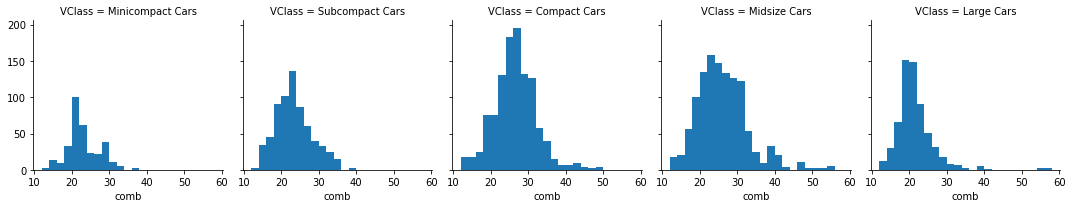

In [20]:
#Using Faceting for Bivariate visualizations
bin_edges = np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, 'comb', bins = bin_edges);

- Faceting can be extended to multivariate cases by having each facet be a bivariate plot instead.

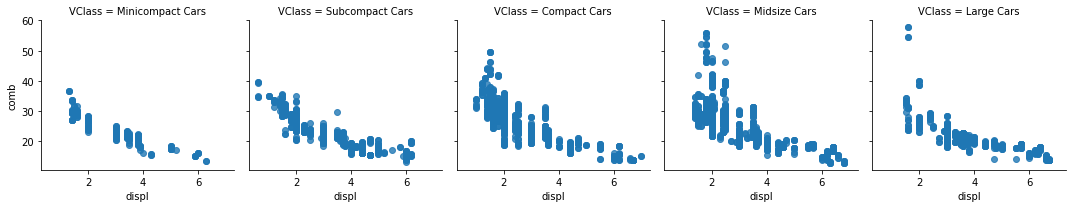

In [21]:
#Faceting across one variable
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(sb.regplot, 'displ', 'comb', fit_reg = False);

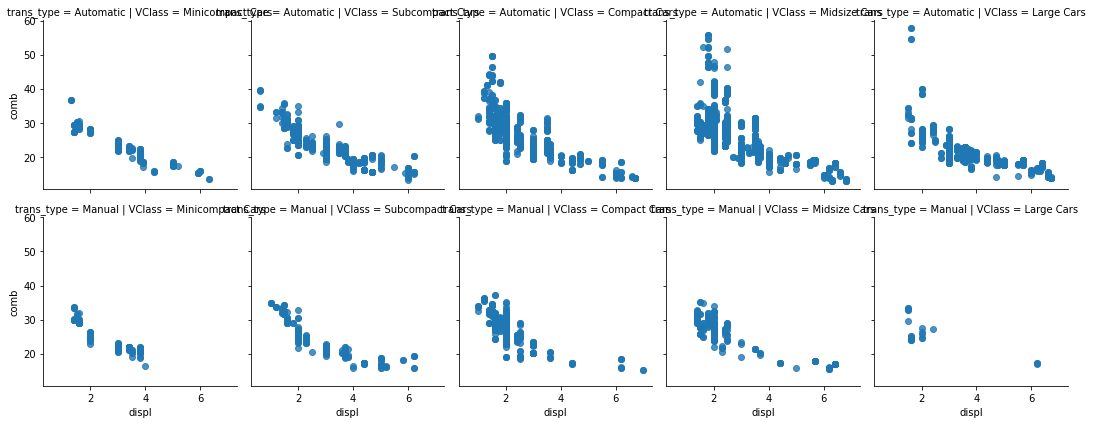

In [22]:
#Faceting across two varibles
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type')
g.map(sb.regplot, 'displ', 'comb', fit_reg = False);

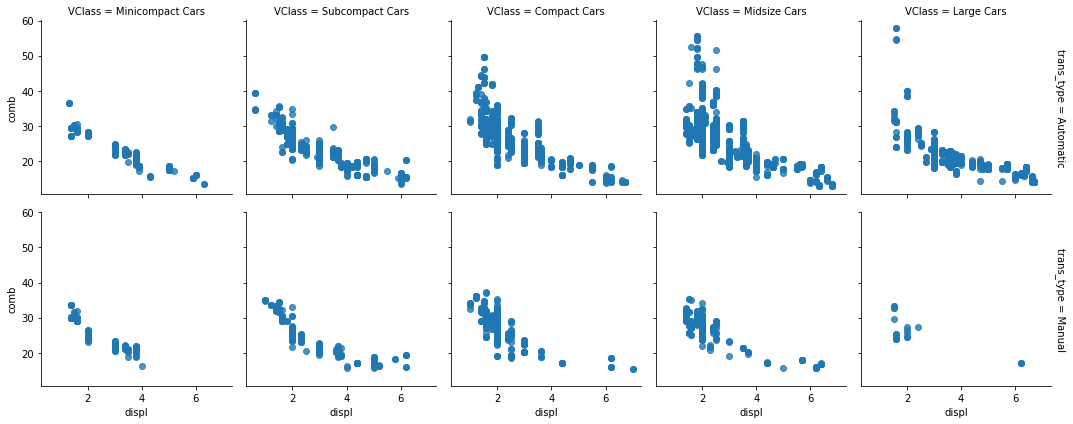

In [23]:
#margin_titles = True
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', margin_titles = True)
g.map(sb.regplot, 'displ', 'comb', fit_reg = False);

- **margin_titles** (default False): if True, the titles for the row variable are drawn to the right of the last column. So instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid.

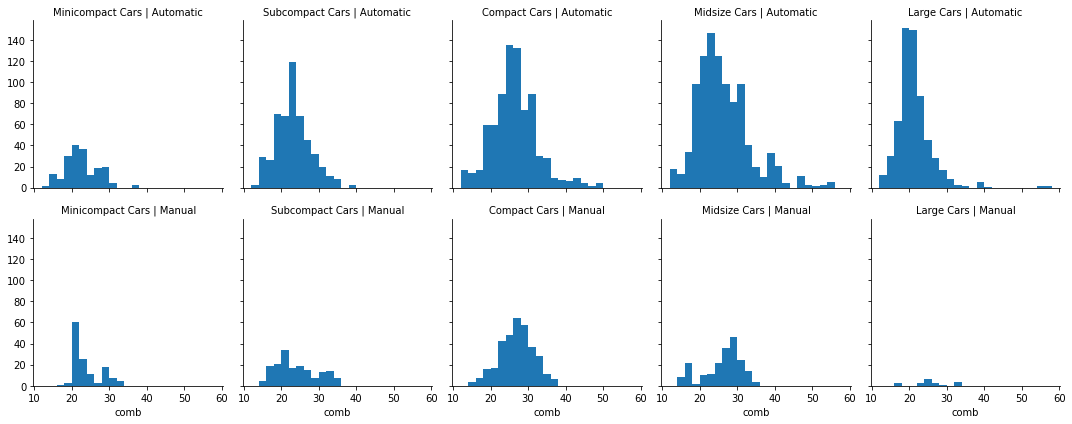

In [24]:
bin_edges = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type')
g.map(plt.hist, 'comb', bins = bin_edges)
g.set_titles('{col_name} | {row_name}');

## Other Adaptations of Bivariate Plots

- Histograms and bar charts can be adapted into bivariate plots by changing the count axis to indicate the mean of a second variable.
- We can follow a similar approach for heat maps and clustered bar charts to change them from bivariate plots into multivariate plots.

- The barplot and pointplot functions are used to plot bar charts with a second variable mean on the vertical axis. This bivariate plot can be extended into a multivariate plot using the **hue** parameter.

### Two categorical variables and one numeric variable
- Adapted clustered bar chart (sb.barplot, sb.pointplot)
- Adapted box plot (violin plot)
- Adapted categorical heatmap (sb.heatmap) ---> report the mean of a third numeric variable instead of the count.

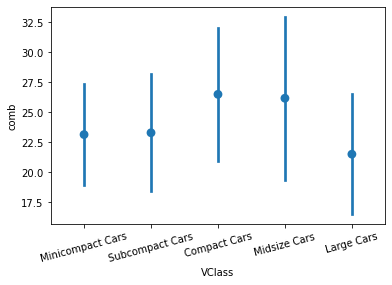

In [25]:
#Bivariate plot
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '')
plt.xticks(rotation = 15);

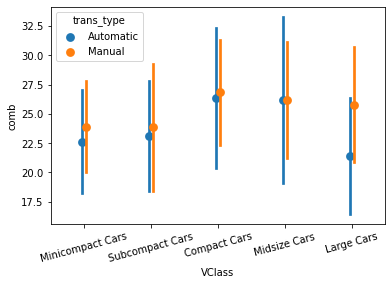

In [26]:
#Multivariate plot
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '', hue = 'trans_type', dodge = True)
plt.xticks(rotation = 15);

- To prevent points and lines from overlapping, set **dodge = True** to offset the two levels slightly.

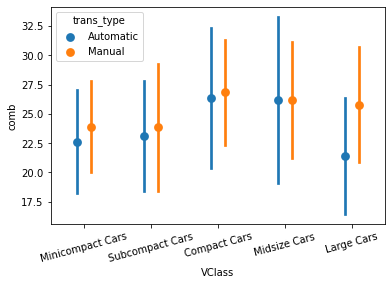

In [27]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '', hue = 'trans_type', dodge = 0.2)
plt.xticks(rotation = 15);

Text(0.5, 1.0, 'Adapted Clustered Bar Chart (Multivariate Plot)')

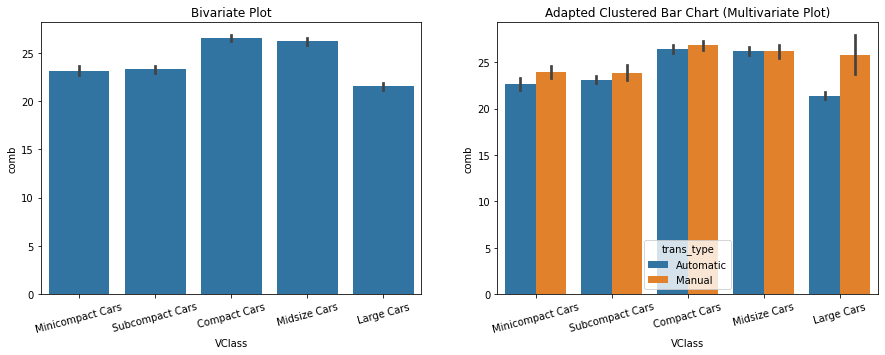

In [28]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = basecolor)
plt.xticks(rotation = 15)
plt.title('Bivariate Plot')

plt.subplot(1,2,2)
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type')
plt.xticks(rotation = 15)
plt.title('Adapted Clustered Bar Chart (Multivariate Plot)')

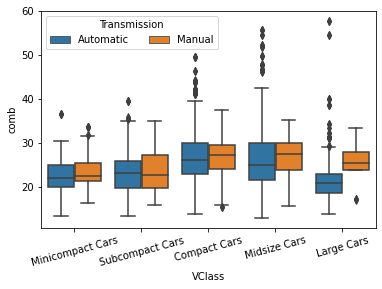

In [29]:
#Clustered Box Plot
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type')
plt.xticks(rotation = 15)
plt.legend(title = 'Transmission', loc = 0, ncol = 2);

- Heatmaps can also be adapted so that instead of color being based on count, color is based on the mean of a third variable.

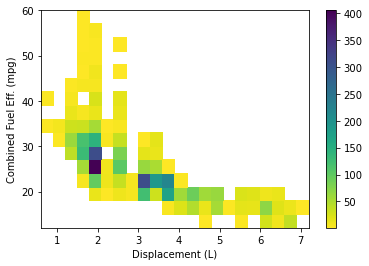

In [30]:
#displ vs. comb
#Regular Heatmap
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y], cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

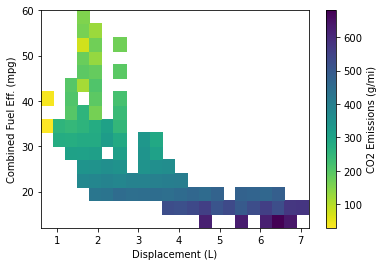

In [31]:
#Adapted Heatmap (method 1)
#displ vs. comb vs. co2
displ_binned = pd.cut(fuel_econ['displ'], bins = bins_x, right = False, include_lowest = True, labels = False).astype(int)
comb_binned = pd.cut(fuel_econ['comb'], bins = bins_y, right = False, include_lowest = True, labels = False).astype(int)
n_points = fuel_econ.groupby([displ_binned, comb_binned]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values
co2_wt = fuel_econ['co2'] / n_points[displ_binned, comb_binned]
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y], cmin = 0.5, cmap = 'viridis_r', 
                weights = co2_wt)
plt.colorbar(label = 'CO2 Emissions (g/mi)')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

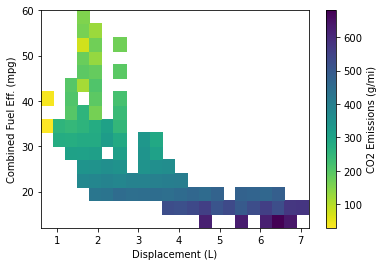

In [32]:
#Adapted Heatmap (method 2)
n_points = h2d[0]
co2_wt = fuel_econ['co2'] / n_points[displ_binned, comb_binned]
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', bins = [bins_x, bins_y], cmin = 0.5, cmap = 'viridis_r', 
                weights = co2_wt)
plt.colorbar(label = 'CO2 Emissions (g/mi)')
plt.xlabel('Displacement (L)')
plt.ylabel('Combined Fuel Eff. (mpg)');

- 2d bar charts (categorical heatmaps) can also be adapted so that instead of color being based on count, color is based on the mean of a third numeric variable.

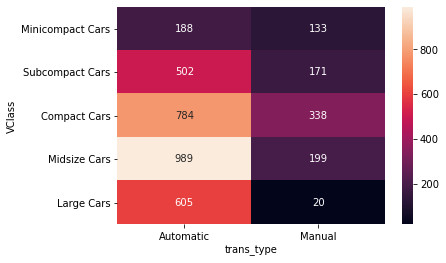

In [33]:
#Regular categorical heatmap
#trans_type vs. VClass
ct_count = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_count = ct_count.reset_index(name = 'count').pivot(index = 'VClass', columns = 'trans_type', values = 'count')
sb.heatmap(ct_count, annot = True, fmt = 'd');

In [34]:
#Adapted Categorical heatmap
#trans_type vs. VClass vs. co2
ct_co2_mean = fuel_econ.groupby(['VClass', 'trans_type'])['co2'].mean()
ct_co2_mean = ct_co2_mean.reset_index().pivot(index= 'VClass', columns = 'trans_type', values = 'co2')
ct_co2_mean

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,406.755319,379.992481
Subcompact Cars,394.687251,391.070175
Compact Cars,352.562500,342.133136
Midsize Cars,360.904954,354.658291
Large Cars,431.062810,357.550000


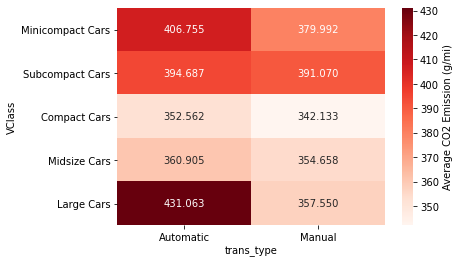

In [35]:
sb.heatmap(ct_co2_mean, annot = True, fmt = '0.3f', cmap = 'Reds', cbar_kws = {'label' : 'Average CO2 Emission (g/mi)'});
#cbar ---> colorbar

- **cbar_kws** provides an additional argument to the color bar component of the heatmap.

## Plot Matrices

- As part of the bivariate exploration, you might be interested in the relationships between lots of variables.
- Using plot matrices, you can explore multiple pairwise relationships at the same time.
- In plot matrices, a grid of plots is generated.
- Unlike a faceted plot, where each subplot is based on one subset of the data, each subplot in a plot matrix is based on the whole data but with two different variables on the axes.
- Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.
- A plot matrix is good for getting a broad overview of pairwise relationships between variables.
- Considering that the size of each subplot will be fairly small, a plot matrix is best as initial exploratory tool to lead you to points of further interest.
- You should follow up a plot matrix by generating additional plots of specific variable sets on their own.

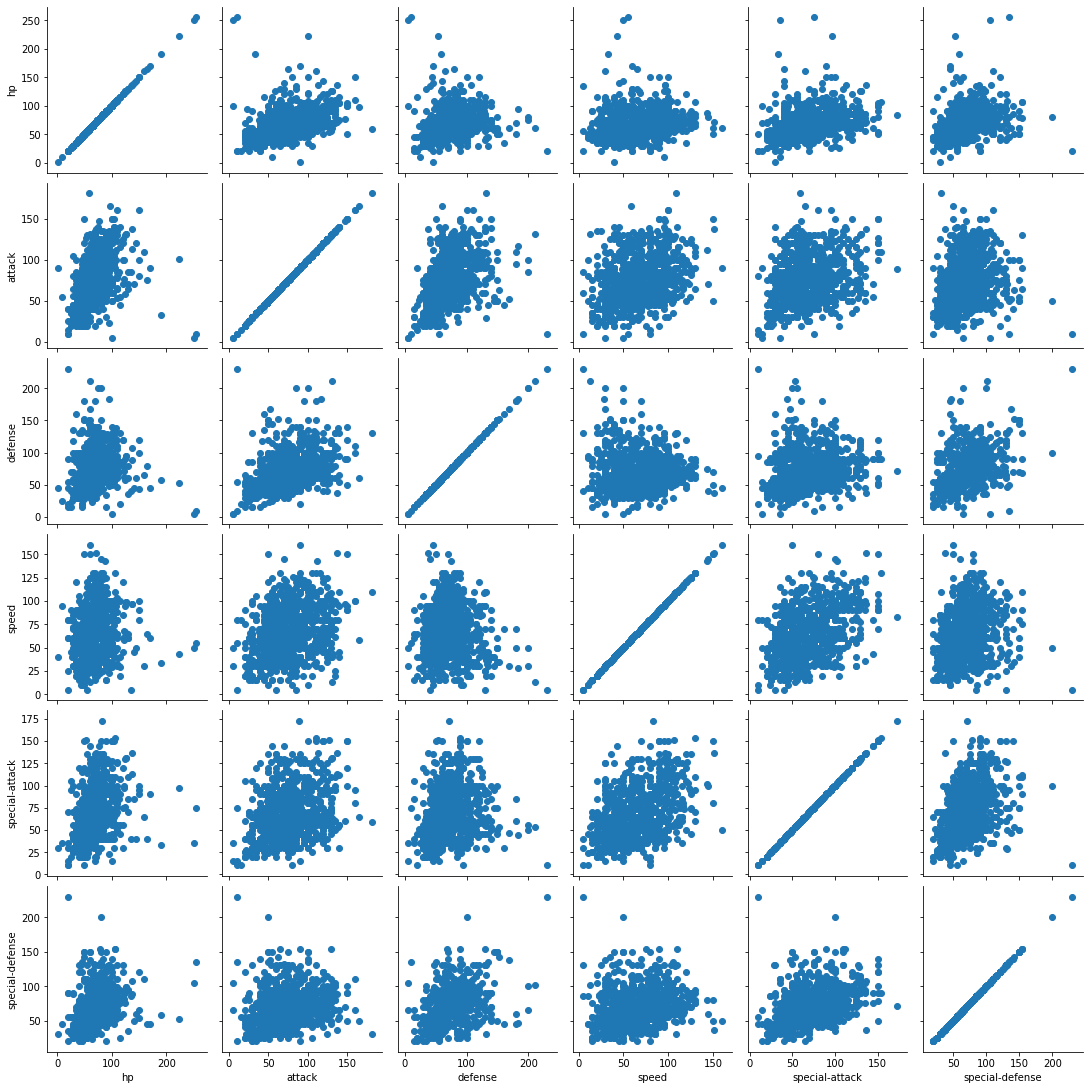

In [81]:
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map(plt.scatter);

- The **vars** paramter specifies the variables of interest. If vars is not specified, then all numeric variables in the dataframe will be put into the plot.
- Every cell will include a scatter plot including those on the diagonal where the row and column variables match up.

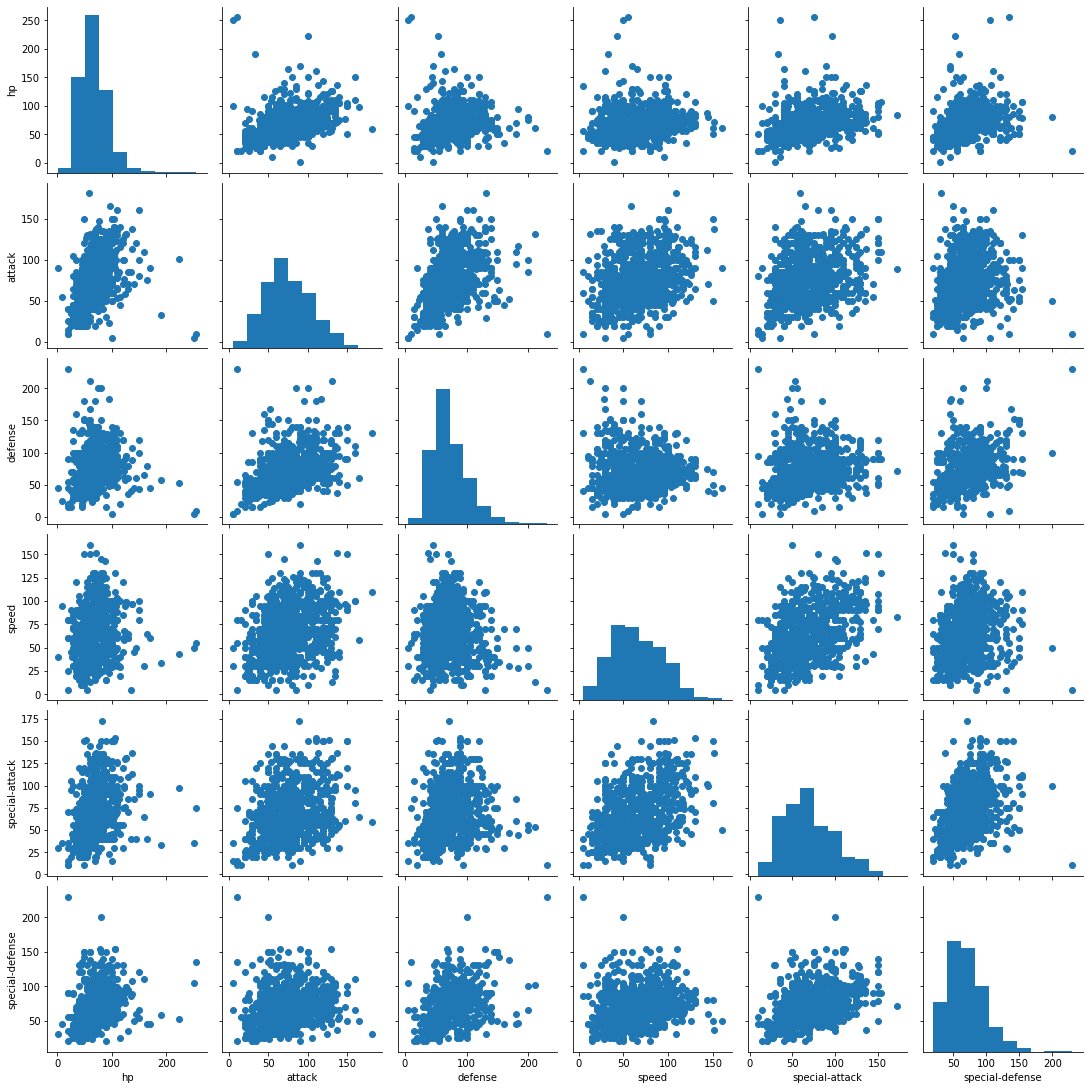

In [83]:
g = sb.PairGrid(data = pokemon, vars = pkmn_stats)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

- **g.map_diag** ---> put histograms on the diagonal.
- **g.map_offdiag** ---> plot scatter plots only on the off diagonal cells.

- For other relationships, the flexibility of **PairGrid** shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

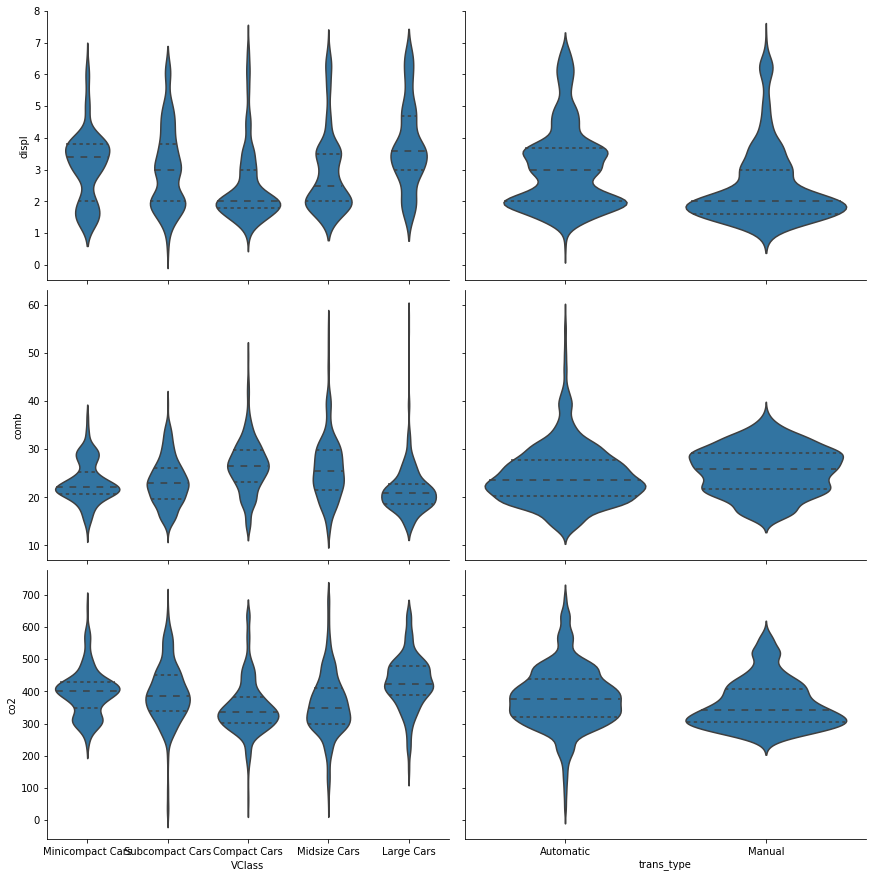

In [140]:
g = sb.PairGrid(data = fuel_econ, x_vars = ['VClass', 'trans_type'],
                y_vars = ['displ', 'comb', 'co2'], height = 4, aspect = 1.5)
g.map(sb.violinplot, inner = 'quartile');

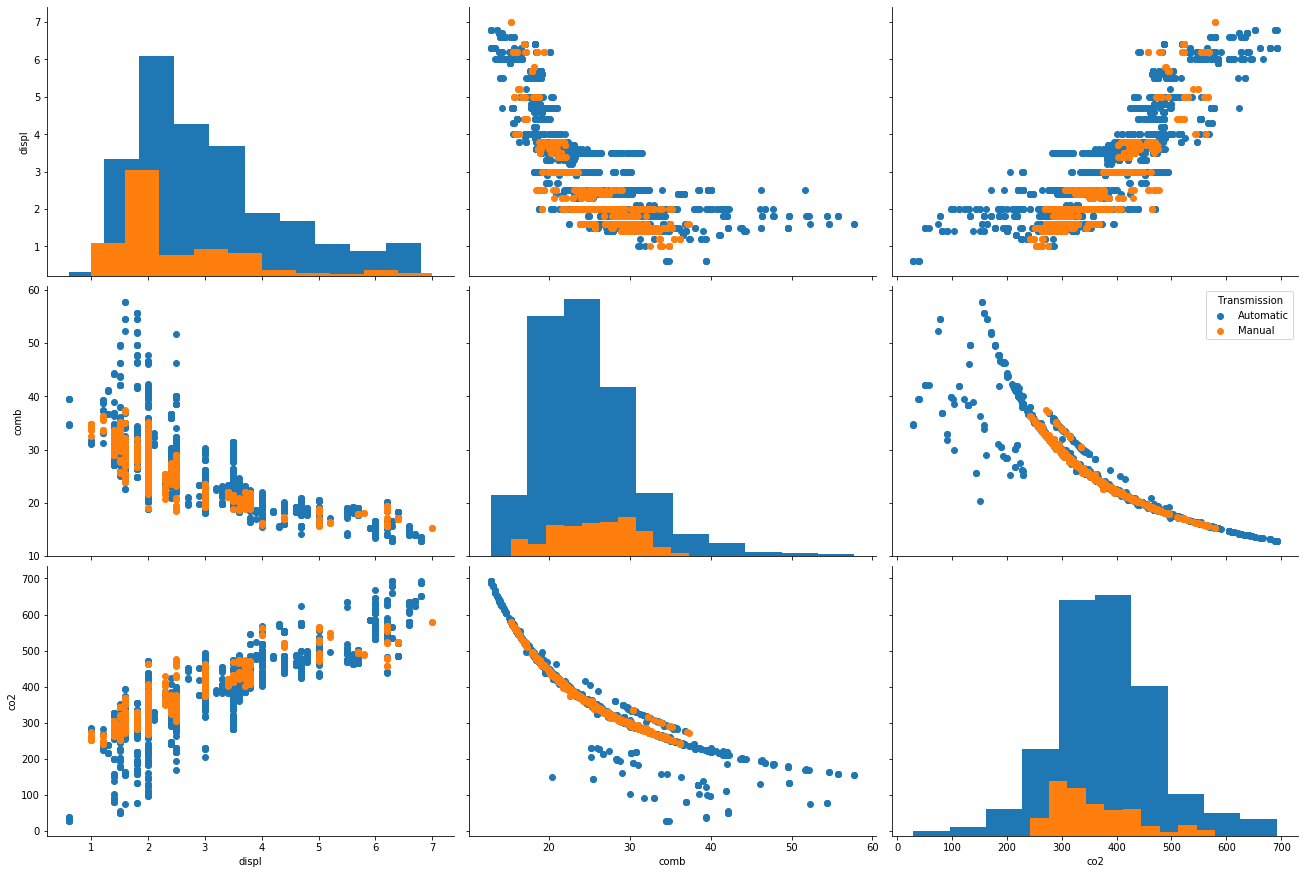

In [9]:
g = sb.PairGrid(data = fuel_econ, vars = ['displ', 'comb', 'co2'], height = 4, aspect = 1.5, 
               hue = 'trans_type', hue_order = ['Automatic', 'Manual'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.legend(title = 'Transmission');

- When you choose to create a plot matrix, be aware that the time it takes to render the plot depends on the number of data points you have and the number of variables you want to plot. Increasing the number of variables increases the number of plots that need to be rendered in a quadratic fashion. In addition, increasing the number of variables means that the individual subplot size needs to be reduced in order to fit the matrix width on your screen. That means that, if you have a lot of data, it might be difficult to see the relationships between variables due to overplotting, and it will take a long time to complete.
- One recommended approach is to take a random subset of the data to plot in the plot matrix instead. Use the plot matrix to identify interesting variable pairs, and then follow it up with individual plots on the full data.

## Correlation Heatmap

- Heatmaps can also be adapted to depict the pairwise correlations between variables in the data.
- Like the plot matrix, each row and column corresponds with a single variable.
- The value and color depicted in each cell is the correlation between the corresponding row and column variable.
- The **corr()** function returns a matrix of pairwise correlation between selected variables.

In [86]:
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


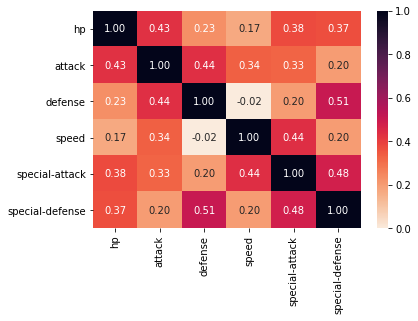

In [93]:
sb.heatmap(pokemon[pkmn_stats].corr(), cmap = 'rocket_r', annot = True, fmt = '0.2f', vmin = 0);

- **vmin**: Set the lower bound of the color map. 
- vmin = 0: Set the lower bound of the color map to zero.

- Instead of using the default sequential color map, a diverging color map is specified and its center is set to zero. That way we can use hue to tell if a correlation is positive or negative, and see its strength from the hue intensity.

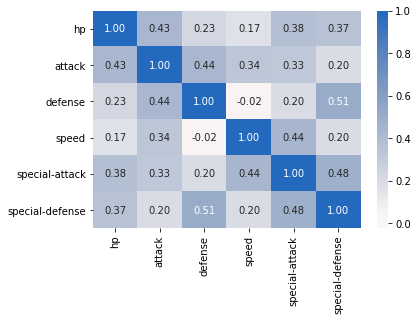

In [149]:
sb.heatmap(pokemon[pkmn_stats].corr(), annot = True, fmt = '0.2f', cmap = 'vlag_r', center = 0);

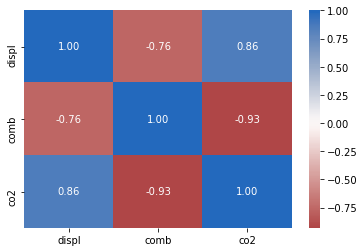

In [40]:
sb.heatmap(fuel_econ[['displ', 'comb', 'co2']].corr(), cmap = 'vlag_r', center = 0, annot = True, fmt = '0.2f');

- Don't forget that correlations are computed based on the strength of **linear** relationship, and that's why a correlation statistic might be misleading in cases where the relationship between two numeric variables is not linear in nature.

## Feature Engineering

- Creating new variables as functions of existing variables in the data, which may lead to a better insight into the research questions you seek to answer.
- Feature engineering is an option when performing an investigation into your data.

#### Example of Feature Engineering
- In this example, we are going to look at biases in pokemon creatures statistics.
- We want to know if a creature offensive stats are biased towards physical or special attack, if their defensive stats are similarly biased towards physical or special defense.

In [101]:
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

- If a creature have a value greater than one, then they favor the physical side, and if less than one, then they favor the special side.

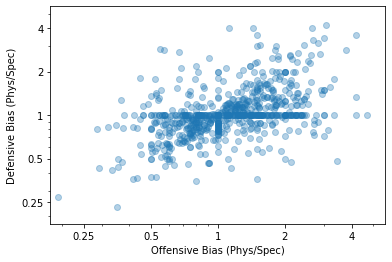

In [135]:
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 1/3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
ticks = [0.25, 0.5, 1, 2,4]
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);
#These particular axis limits center the plot on one on both axes

- Changing the scale of each axis from linear logarithmic so that a bias of 2 : 1 is evenly spaced from the even ratio of 1 in both the physical and special direction.
- Most points seem to fall along a diagonal line.
- In the upper right-hand quadrant, we have pokemon creatures that are physical biased in both offense and defense.
- In the lower left-hand quadrant, they are special biased in both offense and defense.
- There appear to be a large number of pokemons on the Y equals one line showing no defensive bias. These pokemons show a wide range of offensive bias.
- There appear to be much fewer pokemons on the X equals one line showing no defensive bias.

## How Much is Too Much?
- By now, you've seen a lot of ways of expanding the number of variables that can be depicted in a single visualization. The basic positional axes can handle two variables: one on the horizontal and one on the vertical. You can facet by both columns and rows to add up to two variables. Encodings in shape, size, and color could add as many as three more. However, you should try and resist the temptation to overuse your newfound power, and to instead practice some restraint in the number of variables that you include in any one plot.

- When you have only two variables plotted, A and B, you have only one relationship to understand. Add in a third variable C, and you have three pairwise relationships: A vs. B, A vs. C, and B vs. C. You also need to consider one interaction effect between all three variables: Does the value of C affect the relationship between A and B? With a fourth variable, you have six possible pairwise relationships and four different three-variable interaction effects. This exponential explosion of possible relationships with the number of variables means that there is a potential for cognitive overload if the data isn't conveyed clearly.

- This is why it is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately. When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another. If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship.

- When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible. While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.